In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset("mpg")
df.dropna(inplace=True)
X = df["horsepower"].values.reshape(-1, 1)
y = df["mpg"].values

<Axes: xlabel='horsepower', ylabel='mpg'>

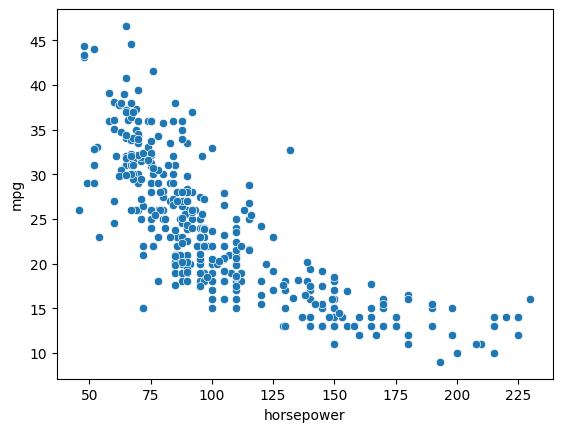

In [3]:
import matplotlib.pyplot as plt

sns.scatterplot(x=df["horsepower"], y=df["mpg"])

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)
model.coef_

array([ 0.        , -0.46618963,  0.00123054])

In [6]:
model.intercept_

56.900099702112854

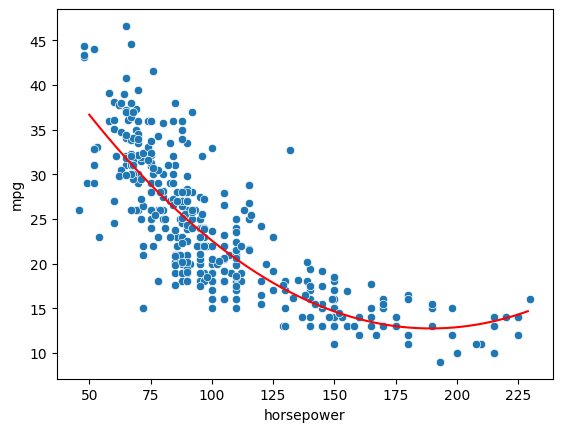

In [9]:
x = np.arange(50, 230).reshape(-1, 1)
x_ = poly.fit_transform(x)
pred_ = model.predict(x_)
sns.scatterplot(x=df["horsepower"], y=df["mpg"])
plt.plot(x, pred_, "r")